# Graph coloring problem
Given an undirected graph and a set of colors, color the graph so that adjacent nodes are different colors

In [1]:
# import necessary packages
import time
import numpy as np
import numpy.random as random

import dimod
import networkx as nx

from dwave.system.samplers import LeapHybridCQMSampler

# only for QUBO/classical solver
import pyqubo
from pyqubo import Binary, Constraint

## Generate graph
(started with graph from Glover's tutorial)

133


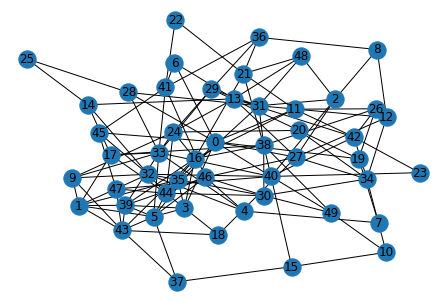

In [2]:
# # graph from glover
# graph = nx.Graph()
# graph.add_nodes_from([1,5])
# graph.add_edges_from([(1,2),(1,5),(2,3),(2,4),(2,5),(3,4),(4,5)])

# # graph.nodes.sort()
# print(type(graph.nodes))

# # house positions
# pos = {1: (0.5, 2.0), 2: (1, 1), 3: (1, 0), 4: (0, 0),  5: (0, 1)}

# nx.draw(graph, pos=pos, with_labels=True)

# generate random graph
# number of nodes
n = 50
# edge generation probability
p = 0.1
# seed (optional)
seed = 45
#generate graph
graph = nx.gnp_random_graph(n,p,seed)

# draw graph
nx.draw(graph, with_labels=True)

print(len(graph.edges))

In [3]:
print(max(d for _, d in graph.degree()))

10


# Build CQM
change `num_colors` to try out coloring the graph with different numbers of colors

In [4]:
# specify number of colors
# num_colors = max(d for _, d in graph.degree()) + 1
num_colors = 10

# instantiate cqm
cqm = dimod.ConstrainedQuadraticModel()

# Build CQM variables
colors = {n: {c: dimod.Binary((n, c)) for c in range(num_colors)} for n in graph.nodes}

# Add constraint to make variables discrete
for n in graph.nodes():
    cqm.add_discrete([(n, c) for c in range(num_colors)])

# Build the constraints: edges have different color end points
for u, v in graph.edges:
    for c in range(num_colors):
        cqm.add_constraint(colors[u][c]*colors[v][c] == 0)

# # define variables
# node_colors = np.empty([len(graph.nodes),num_colors],dtype=tuple)
# for n in graph.nodes:
#     for c in range(num_colors):
#         node_colors[n-1][c] = (dimod.Binary((n,c)))

# # define one-hot coloring constraint
# for n in graph.nodes:
#     cqm.add_discrete(((n,c) for c in range(num_colors)),label=f'color node {n}')
    
# # define adjacent colors constraint
# for (i,j) in graph.edges:
#     for c in range(num_colors):
#         cqm.add_constraint(node_colors[i-1][c]+node_colors[j-1][c]<=1, label=f'check nodes {i},{j} color {c}')

In [5]:
print('objective   :', cqm.objective.to_polystring())
for i in cqm.constraints:
    print(i,":",cqm.constraints[i])

objective   : 0*v(0, 0) + 0*v(0, 1) + 0*v(0, 2) + 0*v(0, 3) + 0*v(0, 4) + 0*v(0, 5) + 0*v(0, 6) + 0*v(0, 7) + 0*v(0, 8) + 0*v(0, 9) + 0*v(1, 0) + 0*v(1, 1) + 0*v(1, 2) + 0*v(1, 3) + 0*v(1, 4) + 0*v(1, 5) + 0*v(1, 6) + 0*v(1, 7) + 0*v(1, 8) + 0*v(1, 9) + 0*v(2, 0) + 0*v(2, 1) + 0*v(2, 2) + 0*v(2, 3) + 0*v(2, 4) + 0*v(2, 5) + 0*v(2, 6) + 0*v(2, 7) + 0*v(2, 8) + 0*v(2, 9) + 0*v(3, 0) + 0*v(3, 1) + 0*v(3, 2) + 0*v(3, 3) + 0*v(3, 4) + 0*v(3, 5) + 0*v(3, 6) + 0*v(3, 7) + 0*v(3, 8) + 0*v(3, 9) + 0*v(4, 0) + 0*v(4, 1) + 0*v(4, 2) + 0*v(4, 3) + 0*v(4, 4) + 0*v(4, 5) + 0*v(4, 6) + 0*v(4, 7) + 0*v(4, 8) + 0*v(4, 9) + 0*v(5, 0) + 0*v(5, 1) + 0*v(5, 2) + 0*v(5, 3) + 0*v(5, 4) + 0*v(5, 5) + 0*v(5, 6) + 0*v(5, 7) + 0*v(5, 8) + 0*v(5, 9) + 0*v(6, 0) + 0*v(6, 1) + 0*v(6, 2) + 0*v(6, 3) + 0*v(6, 4) + 0*v(6, 5) + 0*v(6, 6) + 0*v(6, 7) + 0*v(6, 8) + 0*v(6, 9) + 0*v(7, 0) + 0*v(7, 1) + 0*v(7, 2) + 0*v(7, 3) + 0*v(7, 4) + 0*v(7, 5) + 0*v(7, 6) + 0*v(7, 7) + 0*v(7, 8) + 0*v(7, 9) + 0*v(8, 0) + 0*v(8, 1) + 0*

383dba : v(21, 4)*v(36, 4) == 0
8f12d9 : v(21, 5)*v(36, 5) == 0
cfeffc : v(21, 6)*v(36, 6) == 0
8a71c8 : v(21, 7)*v(36, 7) == 0
34e5dc : v(21, 8)*v(36, 8) == 0
4def1f : v(21, 9)*v(36, 9) == 0
17524a : v(21, 0)*v(38, 0) == 0
079bf3 : v(21, 1)*v(38, 1) == 0
adb592 : v(21, 2)*v(38, 2) == 0
a419bc : v(21, 3)*v(38, 3) == 0
58999d : v(21, 4)*v(38, 4) == 0
4a1b9b : v(21, 5)*v(38, 5) == 0
652be5 : v(21, 6)*v(38, 6) == 0
1f9803 : v(21, 7)*v(38, 7) == 0
7e3f51 : v(21, 8)*v(38, 8) == 0
25a494 : v(21, 9)*v(38, 9) == 0
ef05b9 : v(21, 0)*v(48, 0) == 0
42885b : v(21, 1)*v(48, 1) == 0
561f6f : v(21, 2)*v(48, 2) == 0
50e25c : v(21, 3)*v(48, 3) == 0
3ad2a9 : v(21, 4)*v(48, 4) == 0
6efb67 : v(21, 5)*v(48, 5) == 0
c47b4f : v(21, 6)*v(48, 6) == 0
46d66c : v(21, 7)*v(48, 7) == 0
1ba23f : v(21, 8)*v(48, 8) == 0
8e9d5a : v(21, 9)*v(48, 9) == 0
0fb631 : v(22, 0)*v(41, 0) == 0
09f3e3 : v(22, 1)*v(41, 1) == 0
534e81 : v(22, 2)*v(41, 2) == 0
eb9c64 : v(22, 3)*v(41, 3) == 0
1f02a8 : v(22, 4)*v(41, 4) == 0
9a0337 :

### Check time requirements and problem requirements
less than 10,000 vars and less than 100,000 constraints

In [6]:
sampler = LeapHybridCQMSampler()
print("time required:",sampler.min_time_limit(cqm))
print("num vars:",len(cqm.variables))
print("num constraints:",len(cqm.constraints))

time required: 5
num vars: 500
num constraints: 1380


## Sample/Solve

In [7]:
start = time.time()
# run hybrid solver
sampleset = sampler.sample_cqm(cqm, time_limit=10, label='CQM Graph Coloring small')
feasible_sampleset = sampleset.filter(lambda row: row.is_feasible)
elapsed = time.time() - start
print("Solved in %.2f seconds" % elapsed)

try:
    sample = feasible_sampleset.first.sample
    solution = feasible_sampleset.first
    print(solution)
except:
    print("\nNo feasible solutions found")
    solution = sampleset.first

Solved in 19.31 seconds
Sample(sample={(0, 0): 0.0, (0, 1): 0.0, (0, 2): 0.0, (0, 3): 0.0, (0, 4): 0.0, (0, 5): 0.0, (0, 6): 0.0, (0, 7): 0.0, (0, 8): 1.0, (0, 9): 0.0, (1, 0): 0.0, (1, 1): 0.0, (1, 2): 0.0, (1, 3): 0.0, (1, 4): 0.0, (1, 5): 0.0, (1, 6): 0.0, (1, 7): 0.0, (1, 8): 0.0, (1, 9): 1.0, (2, 0): 1.0, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0, (2, 4): 0.0, (2, 5): 0.0, (2, 6): 0.0, (2, 7): 0.0, (2, 8): 0.0, (2, 9): 0.0, (3, 0): 0.0, (3, 1): 0.0, (3, 2): 1.0, (3, 3): 0.0, (3, 4): 0.0, (3, 5): 0.0, (3, 6): 0.0, (3, 7): 0.0, (3, 8): 0.0, (3, 9): 0.0, (4, 0): 0.0, (4, 1): 0.0, (4, 2): 0.0, (4, 3): 0.0, (4, 4): 0.0, (4, 5): 1.0, (4, 6): 0.0, (4, 7): 0.0, (4, 8): 0.0, (4, 9): 0.0, (5, 0): 1.0, (5, 1): 0.0, (5, 2): 0.0, (5, 3): 0.0, (5, 4): 0.0, (5, 5): 0.0, (5, 6): 0.0, (5, 7): 0.0, (5, 8): 0.0, (5, 9): 0.0, (6, 0): 0.0, (6, 1): 0.0, (6, 2): 0.0, (6, 3): 0.0, (6, 4): 0.0, (6, 5): 0.0, (6, 6): 1.0, (6, 7): 0.0, (6, 8): 0.0, (6, 9): 0.0, (7, 0): 1.0, (7, 1): 0.0, (7, 2): 0.0, (7, 3): 0.0,

In [8]:
print(feasible_sampleset)

   (0, 0) (0, 1) (0, 2) (0, 3) (0, 4) (0, 5) ... (49, 9) energy num_oc. ...
0     0.0    0.0    0.0    0.0    0.0    0.0 ...     0.0    0.0       1 ...
1     0.0    0.0    0.0    0.0    0.0    0.0 ...     0.0    0.0       1 ...
2     1.0    0.0    0.0    0.0    0.0    0.0 ...     0.0    0.0       1 ...
3     0.0    0.0    1.0    0.0    0.0    0.0 ...     0.0    0.0       1 ...
4     0.0    1.0    0.0    0.0    0.0    0.0 ...     0.0    0.0       1 ...
5     0.0    0.0    0.0    0.0    0.0    0.0 ...     0.0    0.0       1 ...
6     0.0    0.0    0.0    0.0    0.0    1.0 ...     0.0    0.0       1 ...
7     0.0    0.0    1.0    0.0    0.0    0.0 ...     0.0    0.0       1 ...
8     0.0    1.0    0.0    0.0    0.0    0.0 ...     0.0    0.0       1 ...
9     0.0    0.0    0.0    0.0    0.0    0.0 ...     0.0    0.0       1 ...
10    0.0    0.0    0.0    0.0    0.0    1.0 ...     1.0    0.0       1 ...
11    0.0    0.0    0.0    0.0    0.0    0.0 ...     0.0    0.0       1 ...
12    0.0   

In [9]:
soln = list(solution.sample.values())
obj_val = sum(c*soln)
print("solution:",solution.sample)
print("objective function value:",obj_val)

solution: {(0, 0): 0.0, (0, 1): 0.0, (0, 2): 0.0, (0, 3): 0.0, (0, 4): 0.0, (0, 5): 0.0, (0, 6): 0.0, (0, 7): 0.0, (0, 8): 1.0, (0, 9): 0.0, (1, 0): 0.0, (1, 1): 0.0, (1, 2): 0.0, (1, 3): 0.0, (1, 4): 0.0, (1, 5): 0.0, (1, 6): 0.0, (1, 7): 0.0, (1, 8): 0.0, (1, 9): 1.0, (2, 0): 1.0, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0, (2, 4): 0.0, (2, 5): 0.0, (2, 6): 0.0, (2, 7): 0.0, (2, 8): 0.0, (2, 9): 0.0, (3, 0): 0.0, (3, 1): 0.0, (3, 2): 1.0, (3, 3): 0.0, (3, 4): 0.0, (3, 5): 0.0, (3, 6): 0.0, (3, 7): 0.0, (3, 8): 0.0, (3, 9): 0.0, (4, 0): 0.0, (4, 1): 0.0, (4, 2): 0.0, (4, 3): 0.0, (4, 4): 0.0, (4, 5): 1.0, (4, 6): 0.0, (4, 7): 0.0, (4, 8): 0.0, (4, 9): 0.0, (5, 0): 1.0, (5, 1): 0.0, (5, 2): 0.0, (5, 3): 0.0, (5, 4): 0.0, (5, 5): 0.0, (5, 6): 0.0, (5, 7): 0.0, (5, 8): 0.0, (5, 9): 0.0, (6, 0): 0.0, (6, 1): 0.0, (6, 2): 0.0, (6, 3): 0.0, (6, 4): 0.0, (6, 5): 0.0, (6, 6): 1.0, (6, 7): 0.0, (6, 8): 0.0, (6, 9): 0.0, (7, 0): 1.0, (7, 1): 0.0, (7, 2): 0.0, (7, 3): 0.0, (7, 4): 0.0, (7, 5): 0.0, (

In [10]:
ye = 0
for i in solution.is_satisfied:
    if not i:
        ye += 1
print(ye)

0


# Redraw graph with solution

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
['olive' 'grey' 'red' 'green' 'orange' 'red' 'yellow' 'red' 'olive'
 'purple' 'cyan' 'red' 'purple' 'grey' 'green' 'purple' 'grey' 'cyan'
 'red' 'grey' 'blue' 'black' 'cyan' 'grey' 'black' 'orange' 'green'
 'black' 'grey' 'yellow' 'red' 'green' 'black' 'blue' 'olive' 'cyan'
 'green' 'green' 'blue' 'orange' 'green' 'red' 'yellow' 'olive' 'blue'
 'orange' 'grey' 'purple' 'purple' 'yellow']


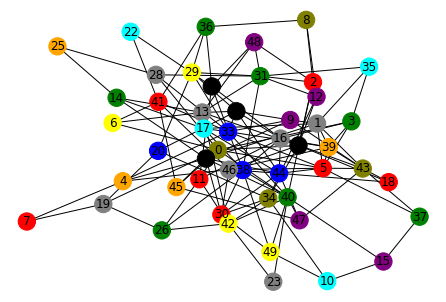

In [11]:
gcolors = ['red', 'blue', 'green', 'black', 'cyan', 'orange', 'yellow', 'purple', 'olive', 'grey']
color_map = np.empty(len(graph.nodes), dtype=object)

nodes = np.array(sorted(graph.nodes))

for i in solution.sample:
    if solution.sample[i] > 0.5:
        color_map[i[0]] = gcolors[i[1]]

print(nodes)
print(color_map)
        
# draw graph
nx.draw(graph, node_color=color_map, with_labels=True)

## Solve Classically

each node one color: $\sum^K_{j=1}x_{ij}=1 \; i=1,...,n$  
adjacent diff colors: $x_{ip}+x_{jp}\leq1 \; p=1,...,K$

In [12]:
# define variables
colors = [[Binary(f'({n}, {c})') for c in range(num_colors)] for n in graph.nodes]

print(colors)

P = 4
H = 0
# color one hot
for n in graph.nodes:
    H += P*Constraint((sum(colors[n][c] for c in range(num_colors))-1)**2, label=f'one hot{n}')

# adjacent nodes
for i,j in graph.edges:
    H += P*Constraint(sum(colors[i][p]*colors[j][p] for p in range(num_colors)), label=f'adjacent {i},{j}')

model = H.compile()
Q = model.to_bqm()
print(Q.to_polystring())

[[Binary('(0, 0)'), Binary('(0, 1)'), Binary('(0, 2)'), Binary('(0, 3)'), Binary('(0, 4)'), Binary('(0, 5)'), Binary('(0, 6)'), Binary('(0, 7)'), Binary('(0, 8)'), Binary('(0, 9)')], [Binary('(1, 0)'), Binary('(1, 1)'), Binary('(1, 2)'), Binary('(1, 3)'), Binary('(1, 4)'), Binary('(1, 5)'), Binary('(1, 6)'), Binary('(1, 7)'), Binary('(1, 8)'), Binary('(1, 9)')], [Binary('(2, 0)'), Binary('(2, 1)'), Binary('(2, 2)'), Binary('(2, 3)'), Binary('(2, 4)'), Binary('(2, 5)'), Binary('(2, 6)'), Binary('(2, 7)'), Binary('(2, 8)'), Binary('(2, 9)')], [Binary('(3, 0)'), Binary('(3, 1)'), Binary('(3, 2)'), Binary('(3, 3)'), Binary('(3, 4)'), Binary('(3, 5)'), Binary('(3, 6)'), Binary('(3, 7)'), Binary('(3, 8)'), Binary('(3, 9)')], [Binary('(4, 0)'), Binary('(4, 1)'), Binary('(4, 2)'), Binary('(4, 3)'), Binary('(4, 4)'), Binary('(4, 5)'), Binary('(4, 6)'), Binary('(4, 7)'), Binary('(4, 8)'), Binary('(4, 9)')], [Binary('(5, 0)'), Binary('(5, 1)'), Binary('(5, 2)'), Binary('(5, 3)'), Binary('(5, 4)')

200 - 4*(18, 1) - 4*(18, 6) - 4*(37, 3) - 4*(37, 6) - 4*(24, 2) - 4*(24, 4) - 4*(18, 2) - 4*(18, 5) - 4*(46, 2) - 4*(46, 3) - 4*(26, 0) - 4*(26, 8) - 4*(39, 0) - 4*(39, 1) - 4*(21, 7) - 4*(36, 7) - 4*(35, 0) - 4*(35, 4) - 4*(29, 0) - 4*(33, 0) - 4*(5, 4) - 4*(33, 4) - 4*(13, 7) - 4*(13, 8) - 4*(19, 2) - 4*(19, 8) - 4*(9, 4) - 4*(9, 8) - 4*(41, 2) - 4*(41, 3) - 4*(43, 4) - 4*(43, 9) - 4*(43, 1) - 4*(43, 2) - 4*(31, 3) - 4*(38, 3) - 4*(1, 0) - 4*(1, 3) - 4*(15, 3) - 4*(15, 7) - 4*(47, 1) - 4*(47, 7) - 4*(9, 0) - 4*(9, 9) - 4*(37, 9) - 4*(20, 7) - 4*(29, 7) - 4*(33, 8) - 4*(11, 7) - 4*(26, 7) - 4*(17, 0) - 4*(17, 8) - 4*(32, 3) - 4*(45, 3) - 4*(0, 6) - 4*(45, 6) - 4*(39, 5) - 4*(46, 5) - 4*(39, 7) - 4*(27, 8) - 4*(46, 8) - 4*(30, 6) - 4*(30, 8) - 4*(23, 2) - 4*(23, 7) - 4*(12, 5) - 4*(12, 8) - 4*(4, 9) - 4*(32, 9) - 4*(14, 3) - 4*(25, 3) - 4*(5, 8) - 4*(1, 2) - 4*(10, 4) - 4*(34, 4) - 4*(16, 0) - 4*(16, 6) - 4*(36, 5) - 4*(36, 8) - 4*(15, 2) - 4*(15, 8) - 4*(12, 4) - 4*(44, 6) - 4*(44, 8)

### Sample

In [13]:
start = time.time()
sampler = dimod.SimulatedAnnealingSampler()
response = sampler.sample(Q)
elapsed = time.time() - start
print("Solved in %.2f seconds" % elapsed)
print(response)

solution1 = response.first
print(solution1)

Solved in 51.88 seconds
  (0, 0) (0, 1) (0, 2) (0, 3) (0, 4) (0, 5) (0, 6) ... (9, 9) energy num_oc.
0      0      0      0      0      0      0      0 ...      0    0.0       1
1      0      0      0      0      0      0      0 ...      0    0.0       1
2      0      0      0      0      0      0      0 ...      0    0.0       1
3      0      1      0      0      0      0      0 ...      1    0.0       1
4      0      0      0      0      0      1      0 ...      0    0.0       1
5      0      0      0      0      0      0      0 ...      0    0.0       1
6      0      0      0      0      1      0      0 ...      0    0.0       1
7      0      1      0      0      0      0      0 ...      0    0.0       1
8      0      1      0      0      0      0      0 ...      0    0.0       1
9      0      0      0      0      0      1      0 ...      0    0.0       1
['BINARY', 10 rows, 10 samples, 500 variables]
Sample(sample={'(0, 0)': 0, '(0, 1)': 0, '(0, 2)': 0, '(0, 3)': 0, '(0, 4)': 0, '(

### Redraw Graph with solution

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
['grey' 'red' 'cyan' 'green' 'orange' 'cyan' 'red' 'grey' 'orange' 'olive'
 'black' 'cyan' 'yellow' 'blue' 'olive' 'green' 'red' 'purple' 'purple'
 'blue' 'green' 'blue' 'orange' 'yellow' 'cyan' 'orange' 'purple' 'green'
 'purple' 'yellow' 'green' 'black' 'black' 'red' 'cyan' 'yellow' 'black'
 'blue' 'yellow' 'olive' 'purple' 'grey' 'green' 'grey' 'grey' 'olive'
 'red' 'black' 'olive' 'cyan']


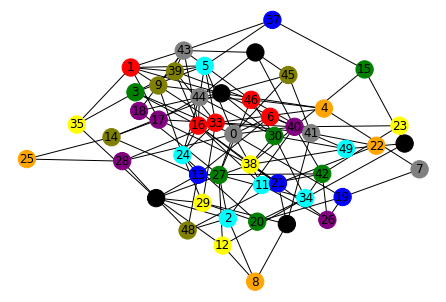

In [14]:
gcolors = ['red', 'blue', 'green', 'black', 'cyan', 'orange', 'yellow', 'purple', 'olive', 'grey']
color_map = np.empty(len(graph.nodes), dtype=object)

sorted_nodes = np.array(sorted(graph.nodes))

for n in graph.nodes:
    for c in range(num_colors):
        i = f'({n}, {c})'
        if response.first.sample[i] > 0.5:
            color_map[n] = gcolors[c]
        if color_map[n] is None:
            color_map[n] = "white"

print(graph.nodes)
print(color_map)
        
# draw graph
nx.draw(graph, node_color=color_map, with_labels=True)

In [15]:
dec = model.decode_sample(response.first.sample, vartype='BINARY')
print(dec.constraints(only_broken=True))
print(len(dec.constraints(only_broken=True)))

{}
0
